In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.set_style({"xtick.direction": "in", "ytick.direction": "in"})
%matplotlib inline

## Kinetics in the FES model
We use the denaturant dependent thermodynamics to estimate kinetics at different final denaturant concentrations.

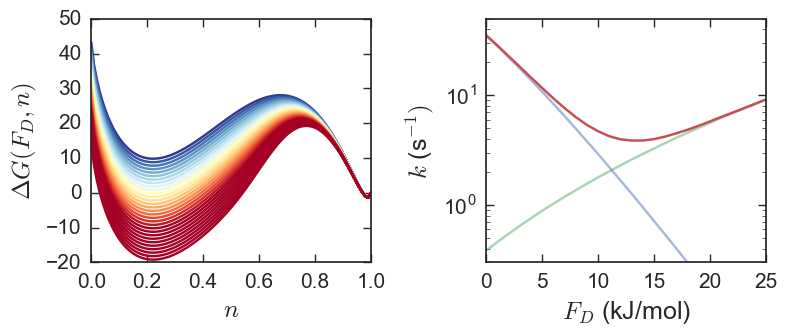

In [2]:
from prefur import thermo
from prefur import kinetics
FES = thermo.FES(65)

beta = 1/(8.314e-3 * 300)
denat = range(0,30,1)
pf = []
pu = []
bf = []
bu = []
kf = []
ku = []
DGeqD = []
fig, ax = plt.subplots(1,2, figsize=(8,3.5))
for i in denat:
    FES.denature(i)
    a,b,c = thermo.stability(FES.nat, FES.DGdenat)
    ax[0].plot(FES.nat, FES.DGdenat, color=plt.cm.RdYlBu_r(i/20.))
    pf.append(a)
    pu.append(b)
    a, b = thermo.barrier(FES.DGdenat)
    bf.append(a)
    bu.append(b)
    kf.append(kinetics.rates(barrier=bf[-1], nres=65))
    ku.append(kinetics.rates(barrier=bu[-1], nres=65))
    
ax[1].semilogy([x for x in denat], kf, alpha=0.5)
ax[1].semilogy([x for x in denat], ku, alpha=0.5)
ax[1].semilogy([x for x in denat], [x+y for x,y in zip(kf,ku)])
ax[1].set_xlim(0,25)
ax[1].set_ylim(3e-1,5e1)
ax[0].set_ylabel('$\Delta G(F_D, n)$', fontsize=18)
ax[0].set_xlabel('$n$', fontsize=18)
ax[1].set_ylabel('$k$ (s$^{-1})$', fontsize=18)
ax[1].set_xlabel('$F_D$ (kJ/mol)', fontsize=18)
plt.tight_layout()


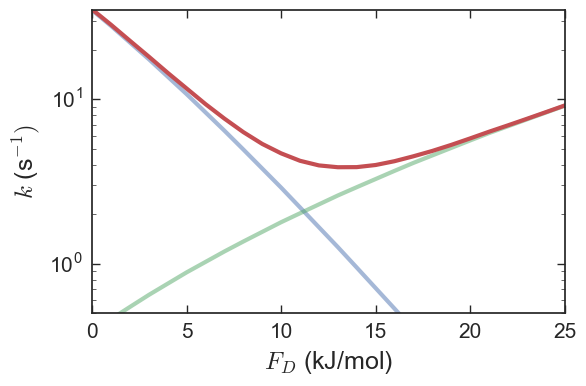

In [3]:
fig, ax = plt.subplots()
ax.semilogy([x for x in denat], kf, lw=3, alpha=0.5)
ax.semilogy([x for x in denat], ku, lw=3, alpha=0.5)
ax.semilogy([x for x in denat], [x+y for x,y in zip(kf,ku)], lw=3)
ax.set_xlim(0,25)
ax.set_ylim(5e-1,3.5e1)
ax.set_ylabel('$k$ (s$^{-1})$', fontsize=18)
ax.set_xlabel('$F_D$ (kJ/mol)', fontsize=18)
plt.tight_layout()
#fig.savefig("chevron.png", dpi=300)